In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [89]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, classification_report, accuracy_score

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [41]:
df = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')

In [161]:
test_df = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')

In [43]:
df.head()

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [45]:
df.describe(include='all')

id    CustomerId Surname    CreditScore Geography  Gender  \
count   165034.0000  1.650340e+05  165034  165034.000000    165034  165034   
unique          NaN           NaN    2797            NaN         3       2   
top             NaN           NaN    Hsia            NaN    France    Male   
freq            NaN           NaN    2456            NaN     94215   93150   
mean     82516.5000  1.569201e+07     NaN     656.454373       NaN     NaN   
std      47641.3565  7.139782e+04     NaN      80.103340       NaN     NaN   
min          0.0000  1.556570e+07     NaN     350.000000       NaN     NaN   
25%      41258.2500  1.563314e+07     NaN     597.000000       NaN     NaN   
50%      82516.5000  1.569017e+07     NaN     659.000000       NaN     NaN   
75%     123774.7500  1.575682e+07     NaN     710.000000       NaN     NaN   
max     165033.0000  1.581569e+07     NaN     850.000000       NaN     NaN   

                  Age         Tenure        Balance  NumOfProducts  \
count   165034.000000  165034.000000  165034.000000  165034.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        38.125888       5.020353   55478.086689       1.554455   
std          8.867205       2.806159   62817.663278       0.547154   
min         18.000000       0.000000       0.000000       1.000000   
25%         32.000000       3.000000       0.000000       1.000000   
50%         37.000000       5.000000       0.000000       2.000000   
75%         42.000000       7.000000  119939.517500       2.000000   
max         92.000000      10.000000  250898.090000       4.000000   

            HasCrCard  IsActiveMember  EstimatedSalary         Exited  
count   165034.000000   165034.000000    165034.000000  165034.000000  
unique            NaN             NaN              NaN            NaN  
top               NaN             NaN              NaN            NaN  
freq              NaN             NaN              NaN            NaN  
mean         0.753954        0.497770    112574.822734       0.211599  
std          0.430707        0.499997     50292.865585       0.408443  
min          0.000000        0.000000        11.580000       0.000000  
25%          1.000000        0.000000     74637.570000       0.000000  
50%          1.000000        0.000000    117948.000000       0.000000  
75%          1.000000        1.000000    155152.467500       0.000000  
max          1.000000        1.000000    199992.480000       1.000000

In [46]:
df['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

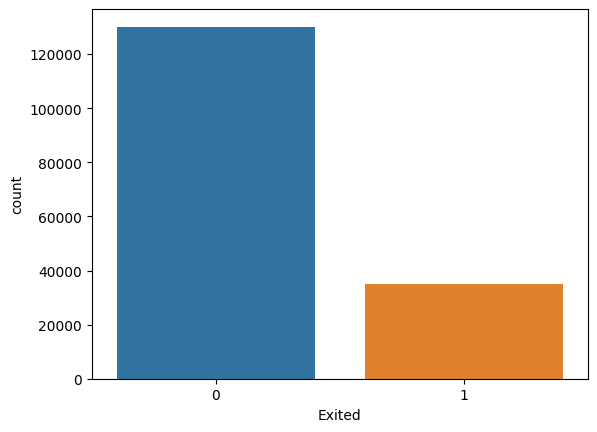

In [47]:
sns.countplot(data=df, x='Exited')

In [48]:
df.isna().any()

id                 False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [49]:
df.duplicated().any()

False

In [50]:
df.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [14]:
df['Surname'].value_counts()

Surname
Hsia         2456
T'ien        2282
Hs?          1611
Kao          1577
Maclean      1577
             ... 
Samaniego       1
Lawley          1
Bonwick         1
Tennant         1
Elkins          1
Name: count, Length: 2797, dtype: int64

In [51]:
df.drop(['id', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [52]:
df['Geography'].value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

In [53]:
df['Gender'].value_counts()

Gender
Male      93150
Female    71884
Name: count, dtype: int64

Geography


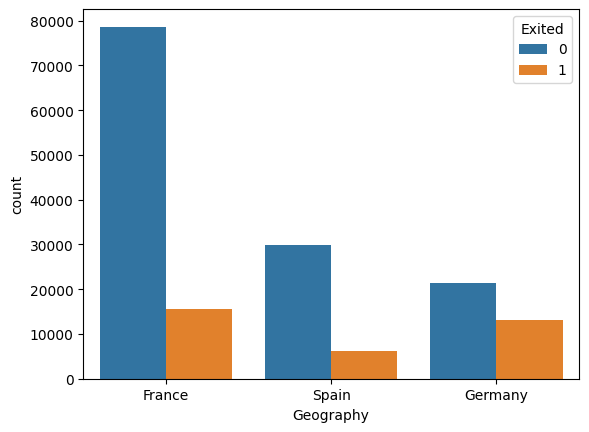

Gender


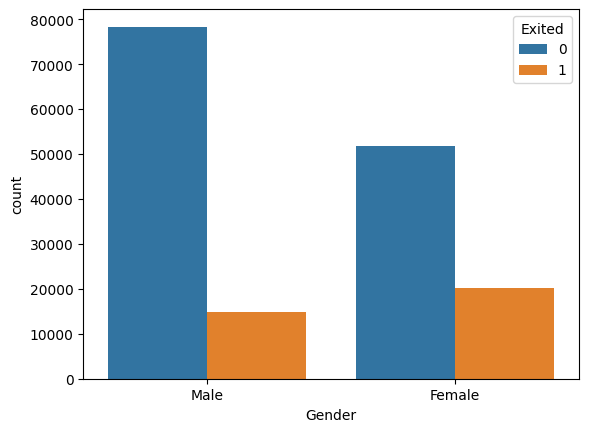

In [54]:
for ele in df.select_dtypes(include='object').columns:
    print(ele)
    sns.countplot(data=df, x=ele, hue='Exited')
    plt.show()

In [55]:
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [56]:
df['Geography'] = df['Geography'].astype('category')
df['Geography'] = df['Geography'].cat.codes
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [57]:
df.head()

CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          668  33.0       3       0.00              2        1.0   
1          627  33.0       1       0.00              2        1.0   
2          678  40.0      10       0.00              2        1.0   
3          581  34.0       2  148882.54              1        1.0   
4          716  33.0       5       0.00              2        1.0   

   IsActiveMember  EstimatedSalary  Exited  Gender_1  Geography_1  Geography_2  
0             0.0        181449.97       0      True        False        False  
1             1.0         49503.50       0      True        False        False  
2             0.0        184866.69       0      True        False        False  
3             1.0         84560.88       0      True        False        False  
4             1.0         15068.83       0      True        False         True

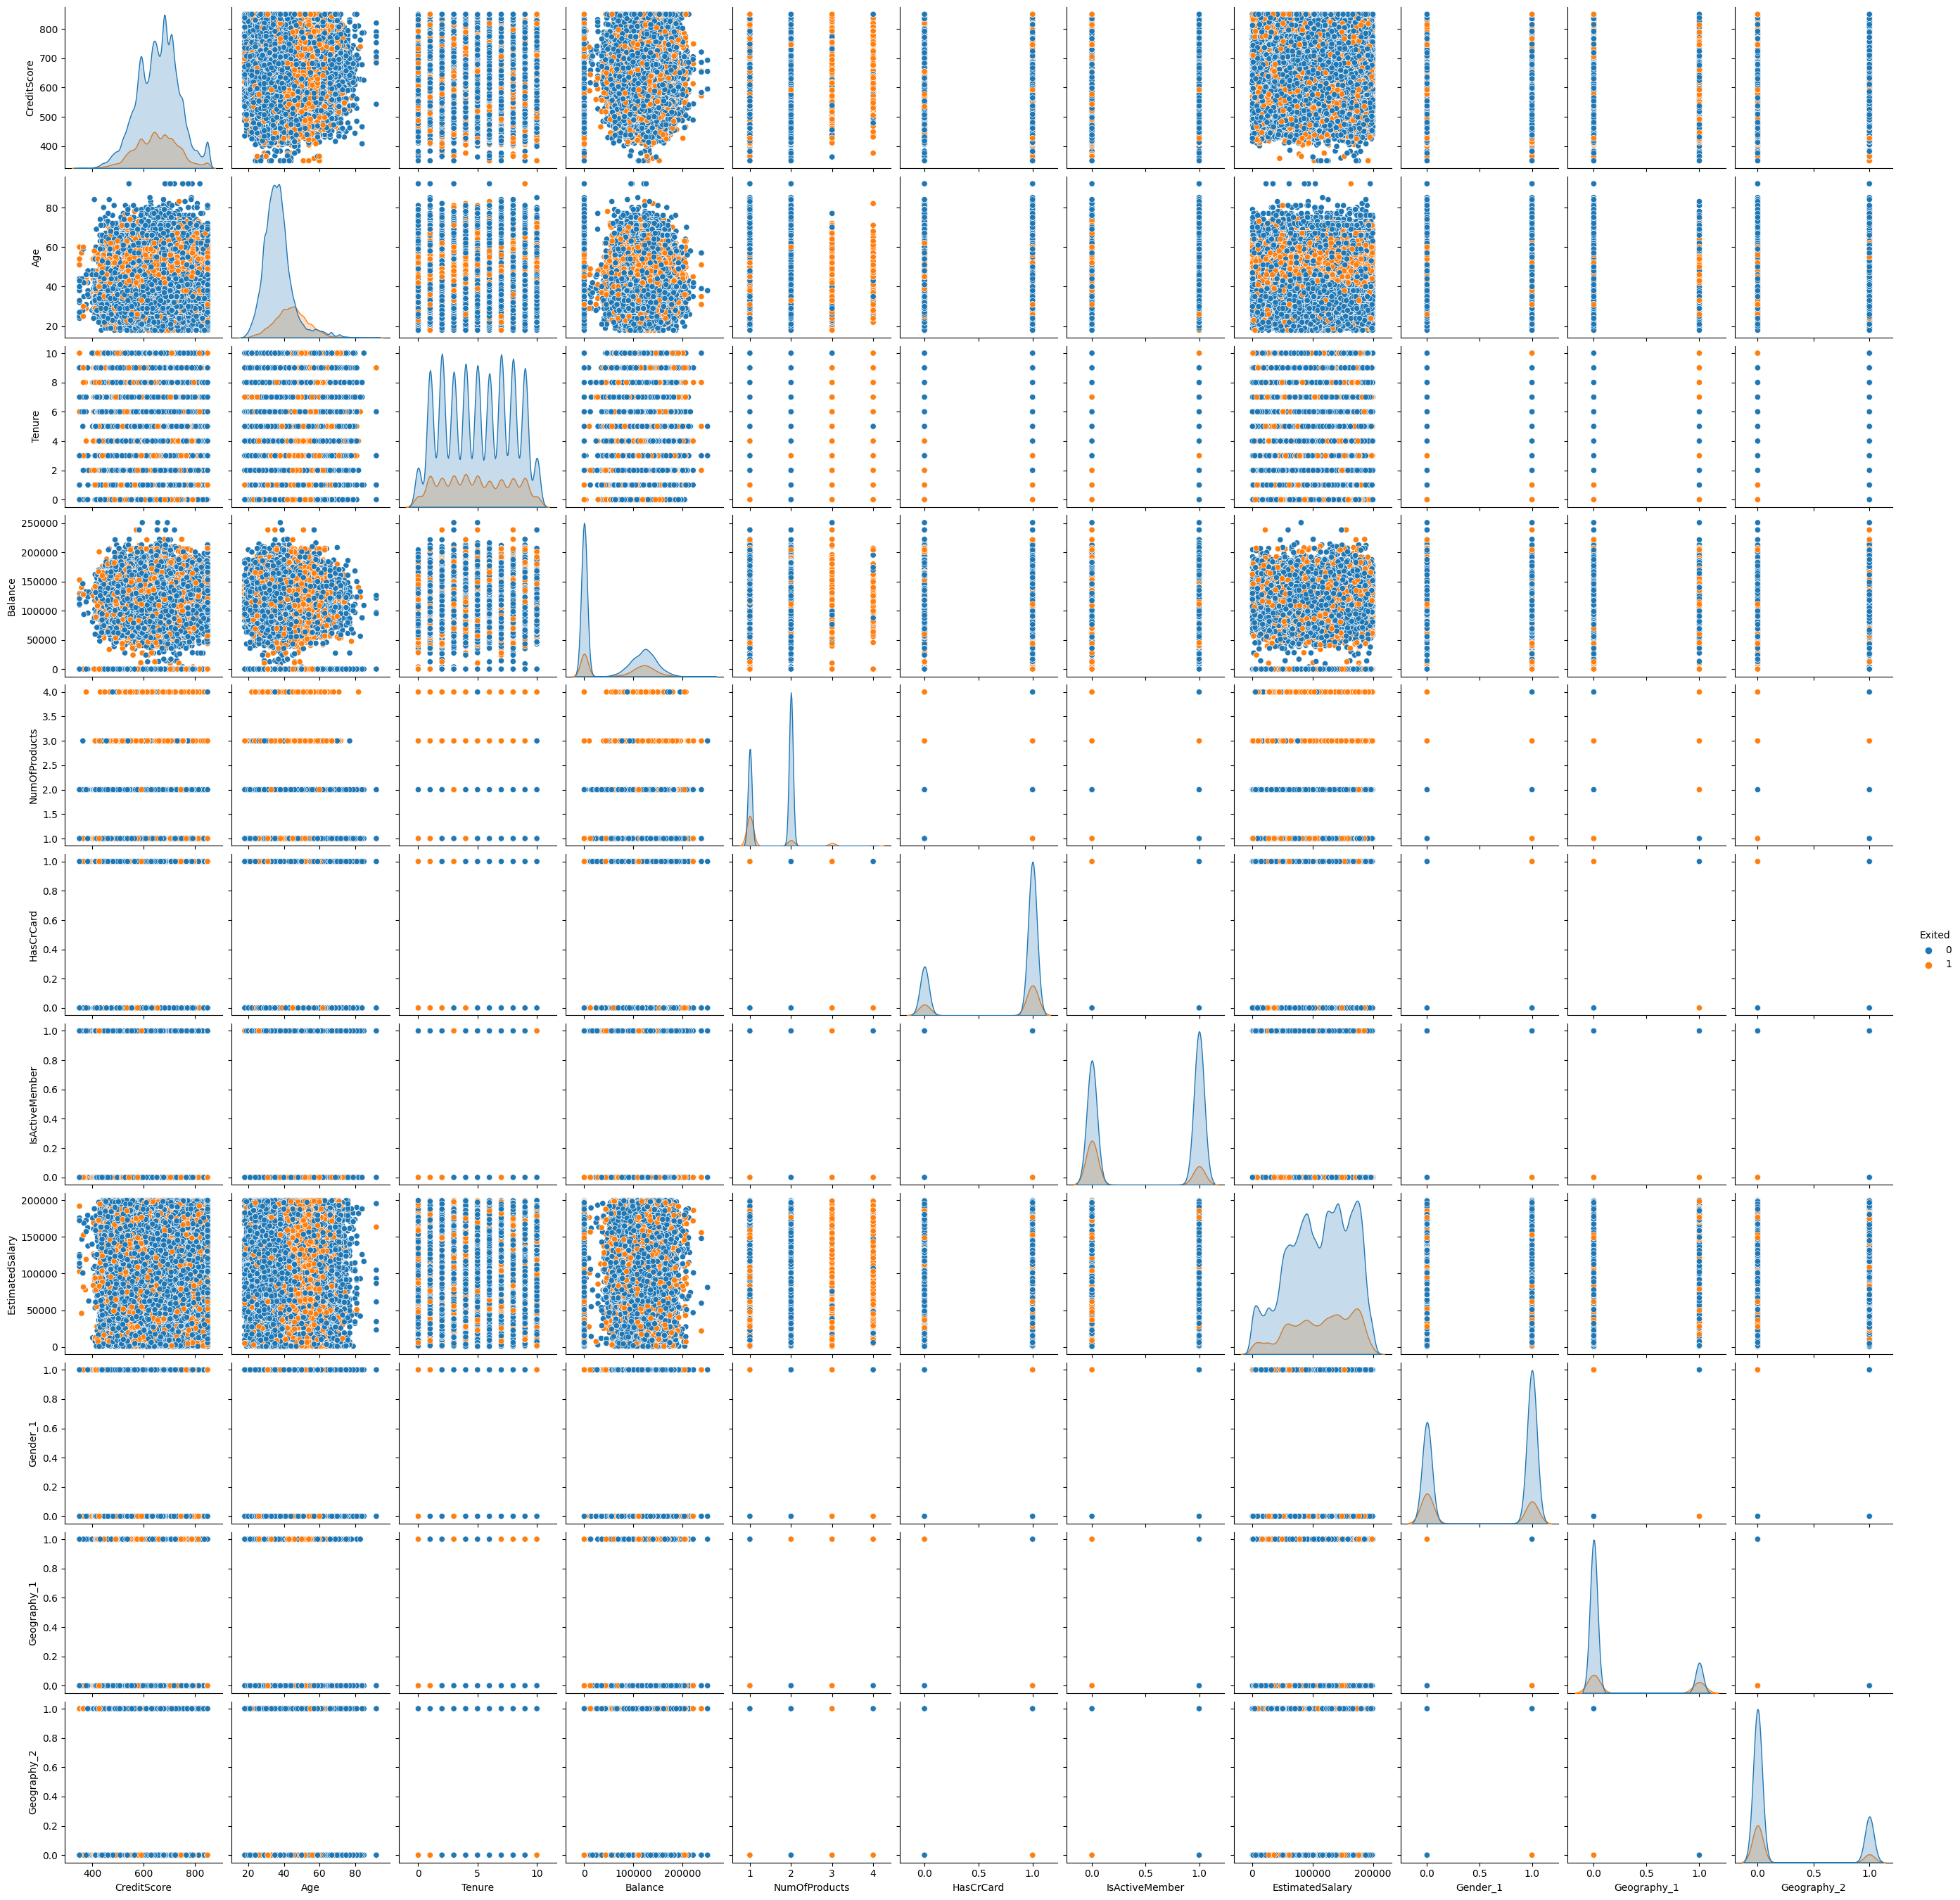

In [27]:
sns.pairplot(df, hue='Exited')

In [22]:
df.skew()

CreditScore       -0.059291
Age                0.968063
Tenure             0.006490
Balance            0.382020
NumOfProducts      0.368278
HasCrCard         -1.179255
IsActiveMember     0.008920
EstimatedSalary   -0.309022
Exited             1.412215
Gender_1          -0.259886
Geography_1        1.426291
Geography_2        1.355898
dtype: float64

<Axes: >

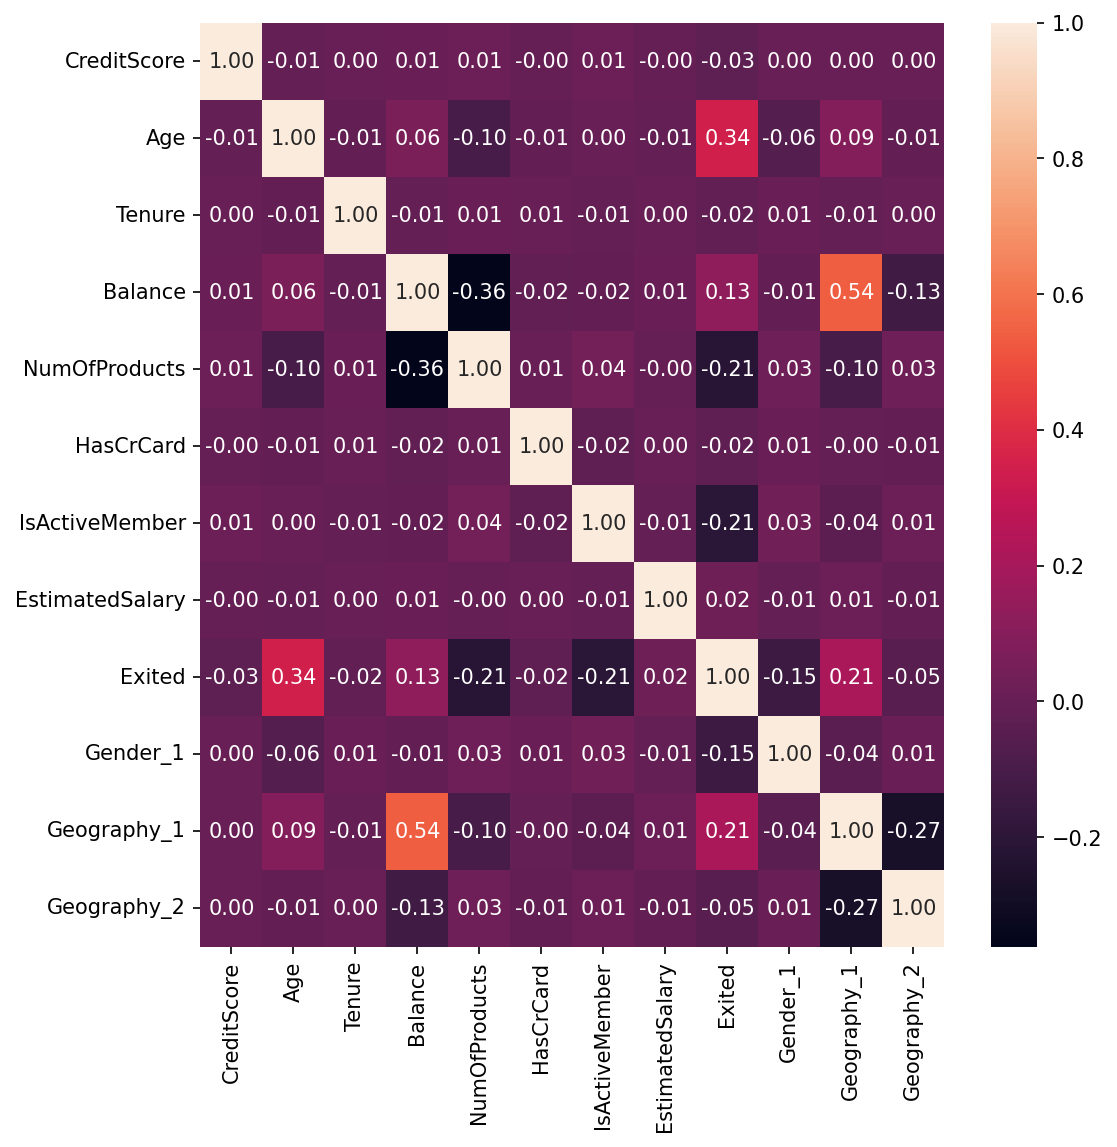

In [58]:
plt.figure(figsize=(8, 8), dpi=150)
sns.heatmap(df.corr(), fmt='.2f', annot=True)

In [25]:
df['Tenure'].value_counts()

Tenure
2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: count, dtype: int64

In [30]:
ser, bins = pd.qcut(df['Tenure'], 4, labels=["<3", "3~5", "5~7", ">7"], retbins=True)

In [31]:
ser

0          <3
1          <3
2          >7
3          <3
4         3~5
         ... 
165029     <3
165030     <3
165031    3~5
165032    5~7
165033     <3
Name: Tenure, Length: 165034, dtype: category
Categories (4, object): ['<3' < '3~5' < '5~7' < '>7']

In [32]:
bins

array([ 0.,  3.,  5.,  7., 10.])

In [33]:
df['age_cat'] = ser

In [34]:
df.head()

CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          668  33.0       3       0.00              2        1.0   
1          627  33.0       1       0.00              2        1.0   
2          678  40.0      10       0.00              2        1.0   
3          581  34.0       2  148882.54              1        1.0   
4          716  33.0       5       0.00              2        1.0   

   IsActiveMember  EstimatedSalary  Exited  Gender_1  Geography_1  \
0             0.0        181449.97       0      True        False   
1             1.0         49503.50       0      True        False   
2             0.0        184866.69       0      True        False   
3             1.0         84560.88       0      True        False   
4             1.0         15068.83       0      True        False   

   Geography_2 age_cat  
0        False      <3  
1        False      <3  
2        False      >7  
3        False      <3  
4         True     3~5

In [62]:
df['Tenure'] = df['Tenure'].astype('category')
df['Tenure'] = df['Tenure'].cat.codes
df = pd.get_dummies(df, columns=['Tenure'], drop_first=True)

<Axes: >

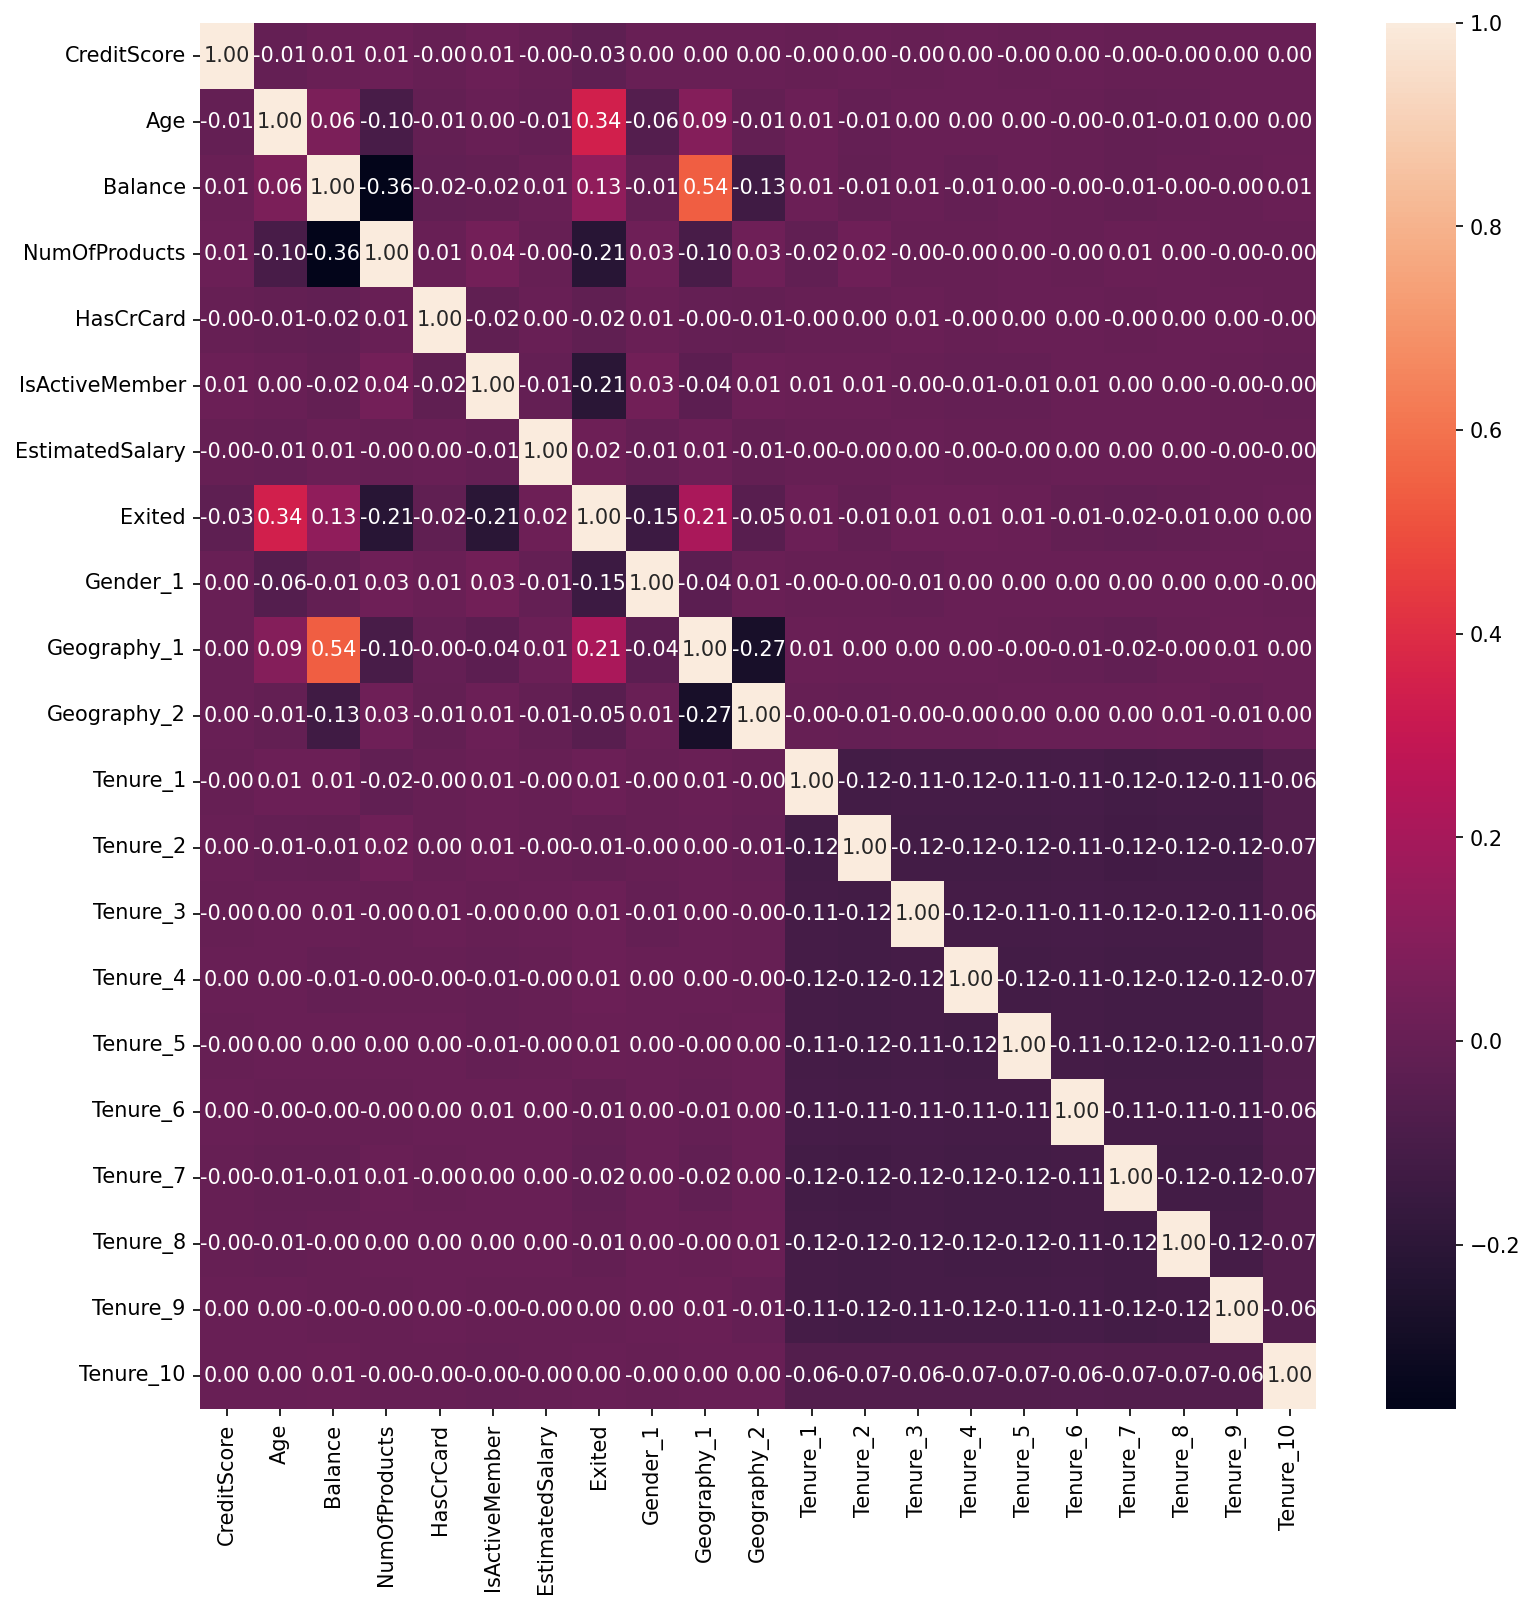

In [65]:
plt.figure(figsize=(12, 12), dpi=150)
sns.heatmap(df.corr(), fmt='.2f', annot=True)

In [59]:
df.head()

CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          668  33.0       3       0.00              2        1.0   
1          627  33.0       1       0.00              2        1.0   
2          678  40.0      10       0.00              2        1.0   
3          581  34.0       2  148882.54              1        1.0   
4          716  33.0       5       0.00              2        1.0   

   IsActiveMember  EstimatedSalary  Exited  Gender_1  Geography_1  Geography_2  
0             0.0        181449.97       0      True        False        False  
1             1.0         49503.50       0      True        False        False  
2             0.0        184866.69       0      True        False        False  
3             1.0         84560.88       0      True        False        False  
4             1.0         15068.83       0      True        False         True

In [60]:
df['NumOfProducts'].value_counts()

NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

In [66]:
df['NumOfProducts'] = df['NumOfProducts'].astype('category')
df['NumOfProducts'] = df['NumOfProducts'].cat.codes
df = pd.get_dummies(df, columns=['NumOfProducts'], drop_first=True)

<Axes: >

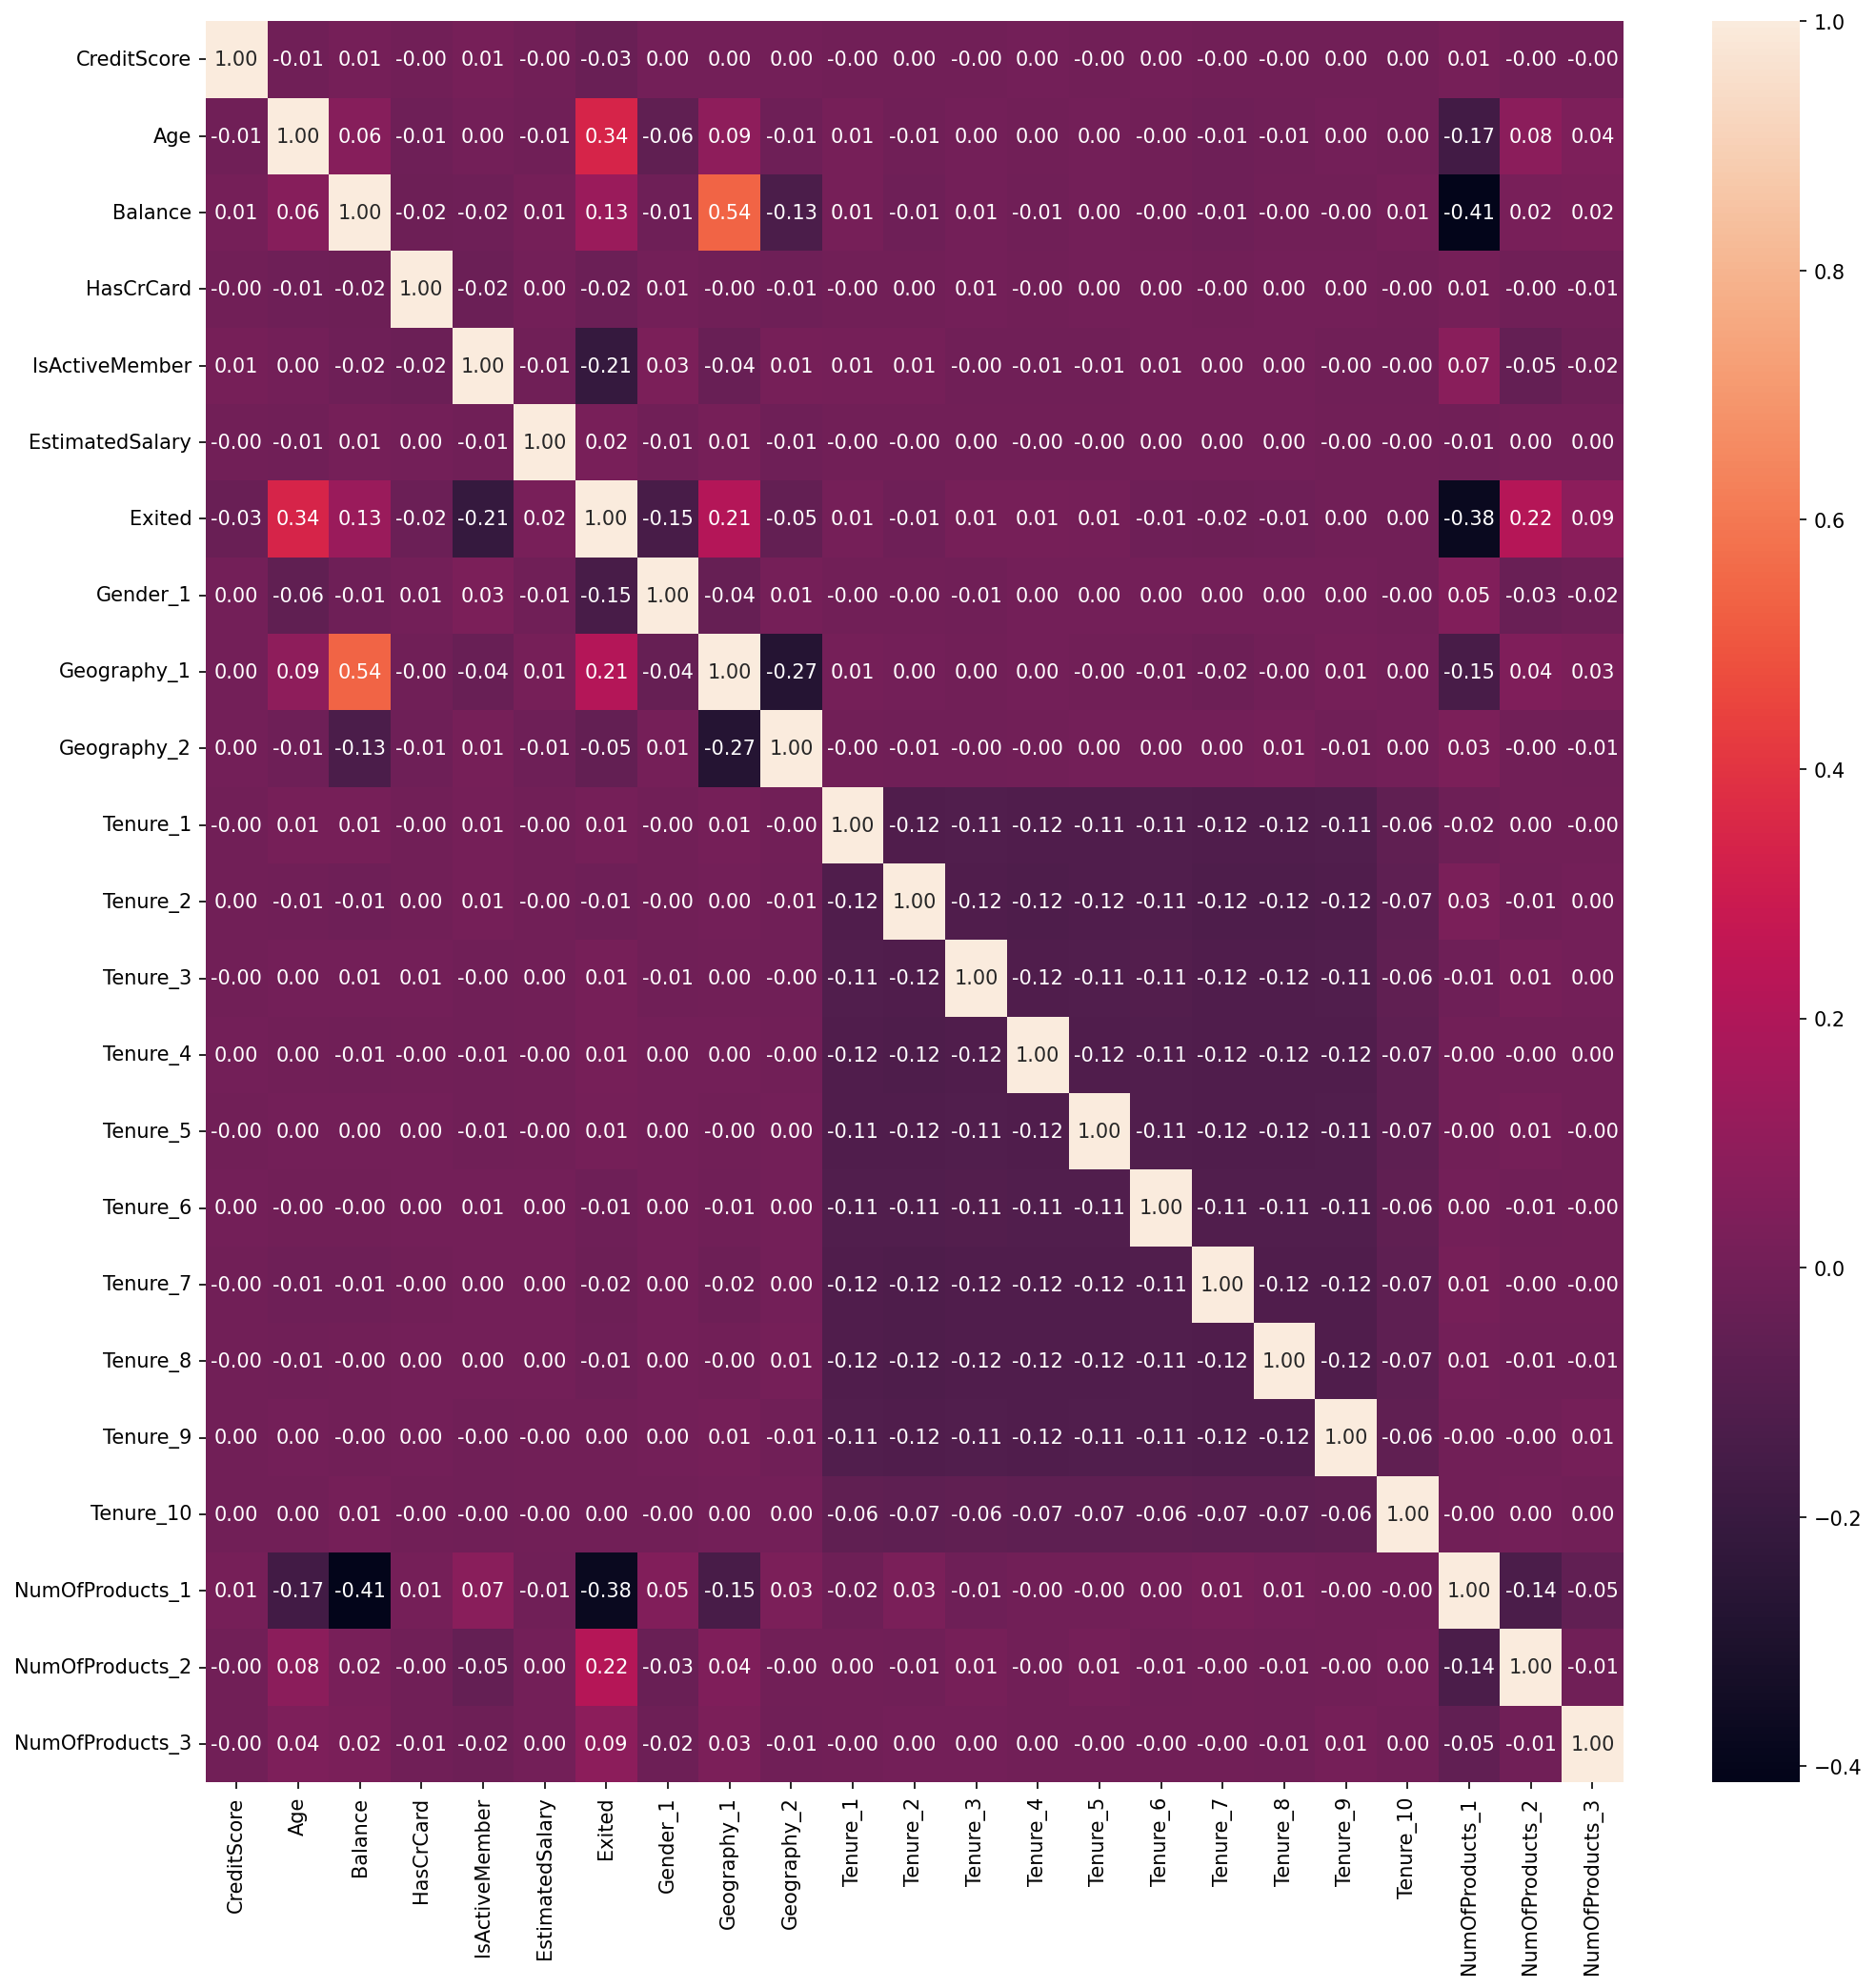

In [67]:
plt.figure(figsize=(16, 16), dpi=150)
sns.heatmap(df.corr(), fmt='.2f', annot=True)

In [68]:
df['HasCrCard'].value_counts()

HasCrCard
1.0    124428
0.0     40606
Name: count, dtype: int64

In [69]:
df['HasCrCard'] = df['HasCrCard'].astype('category')
df['HasCrCard'] = df['HasCrCard'].cat.codes
df = pd.get_dummies(df, columns=['HasCrCard'], drop_first=True)

<Axes: >

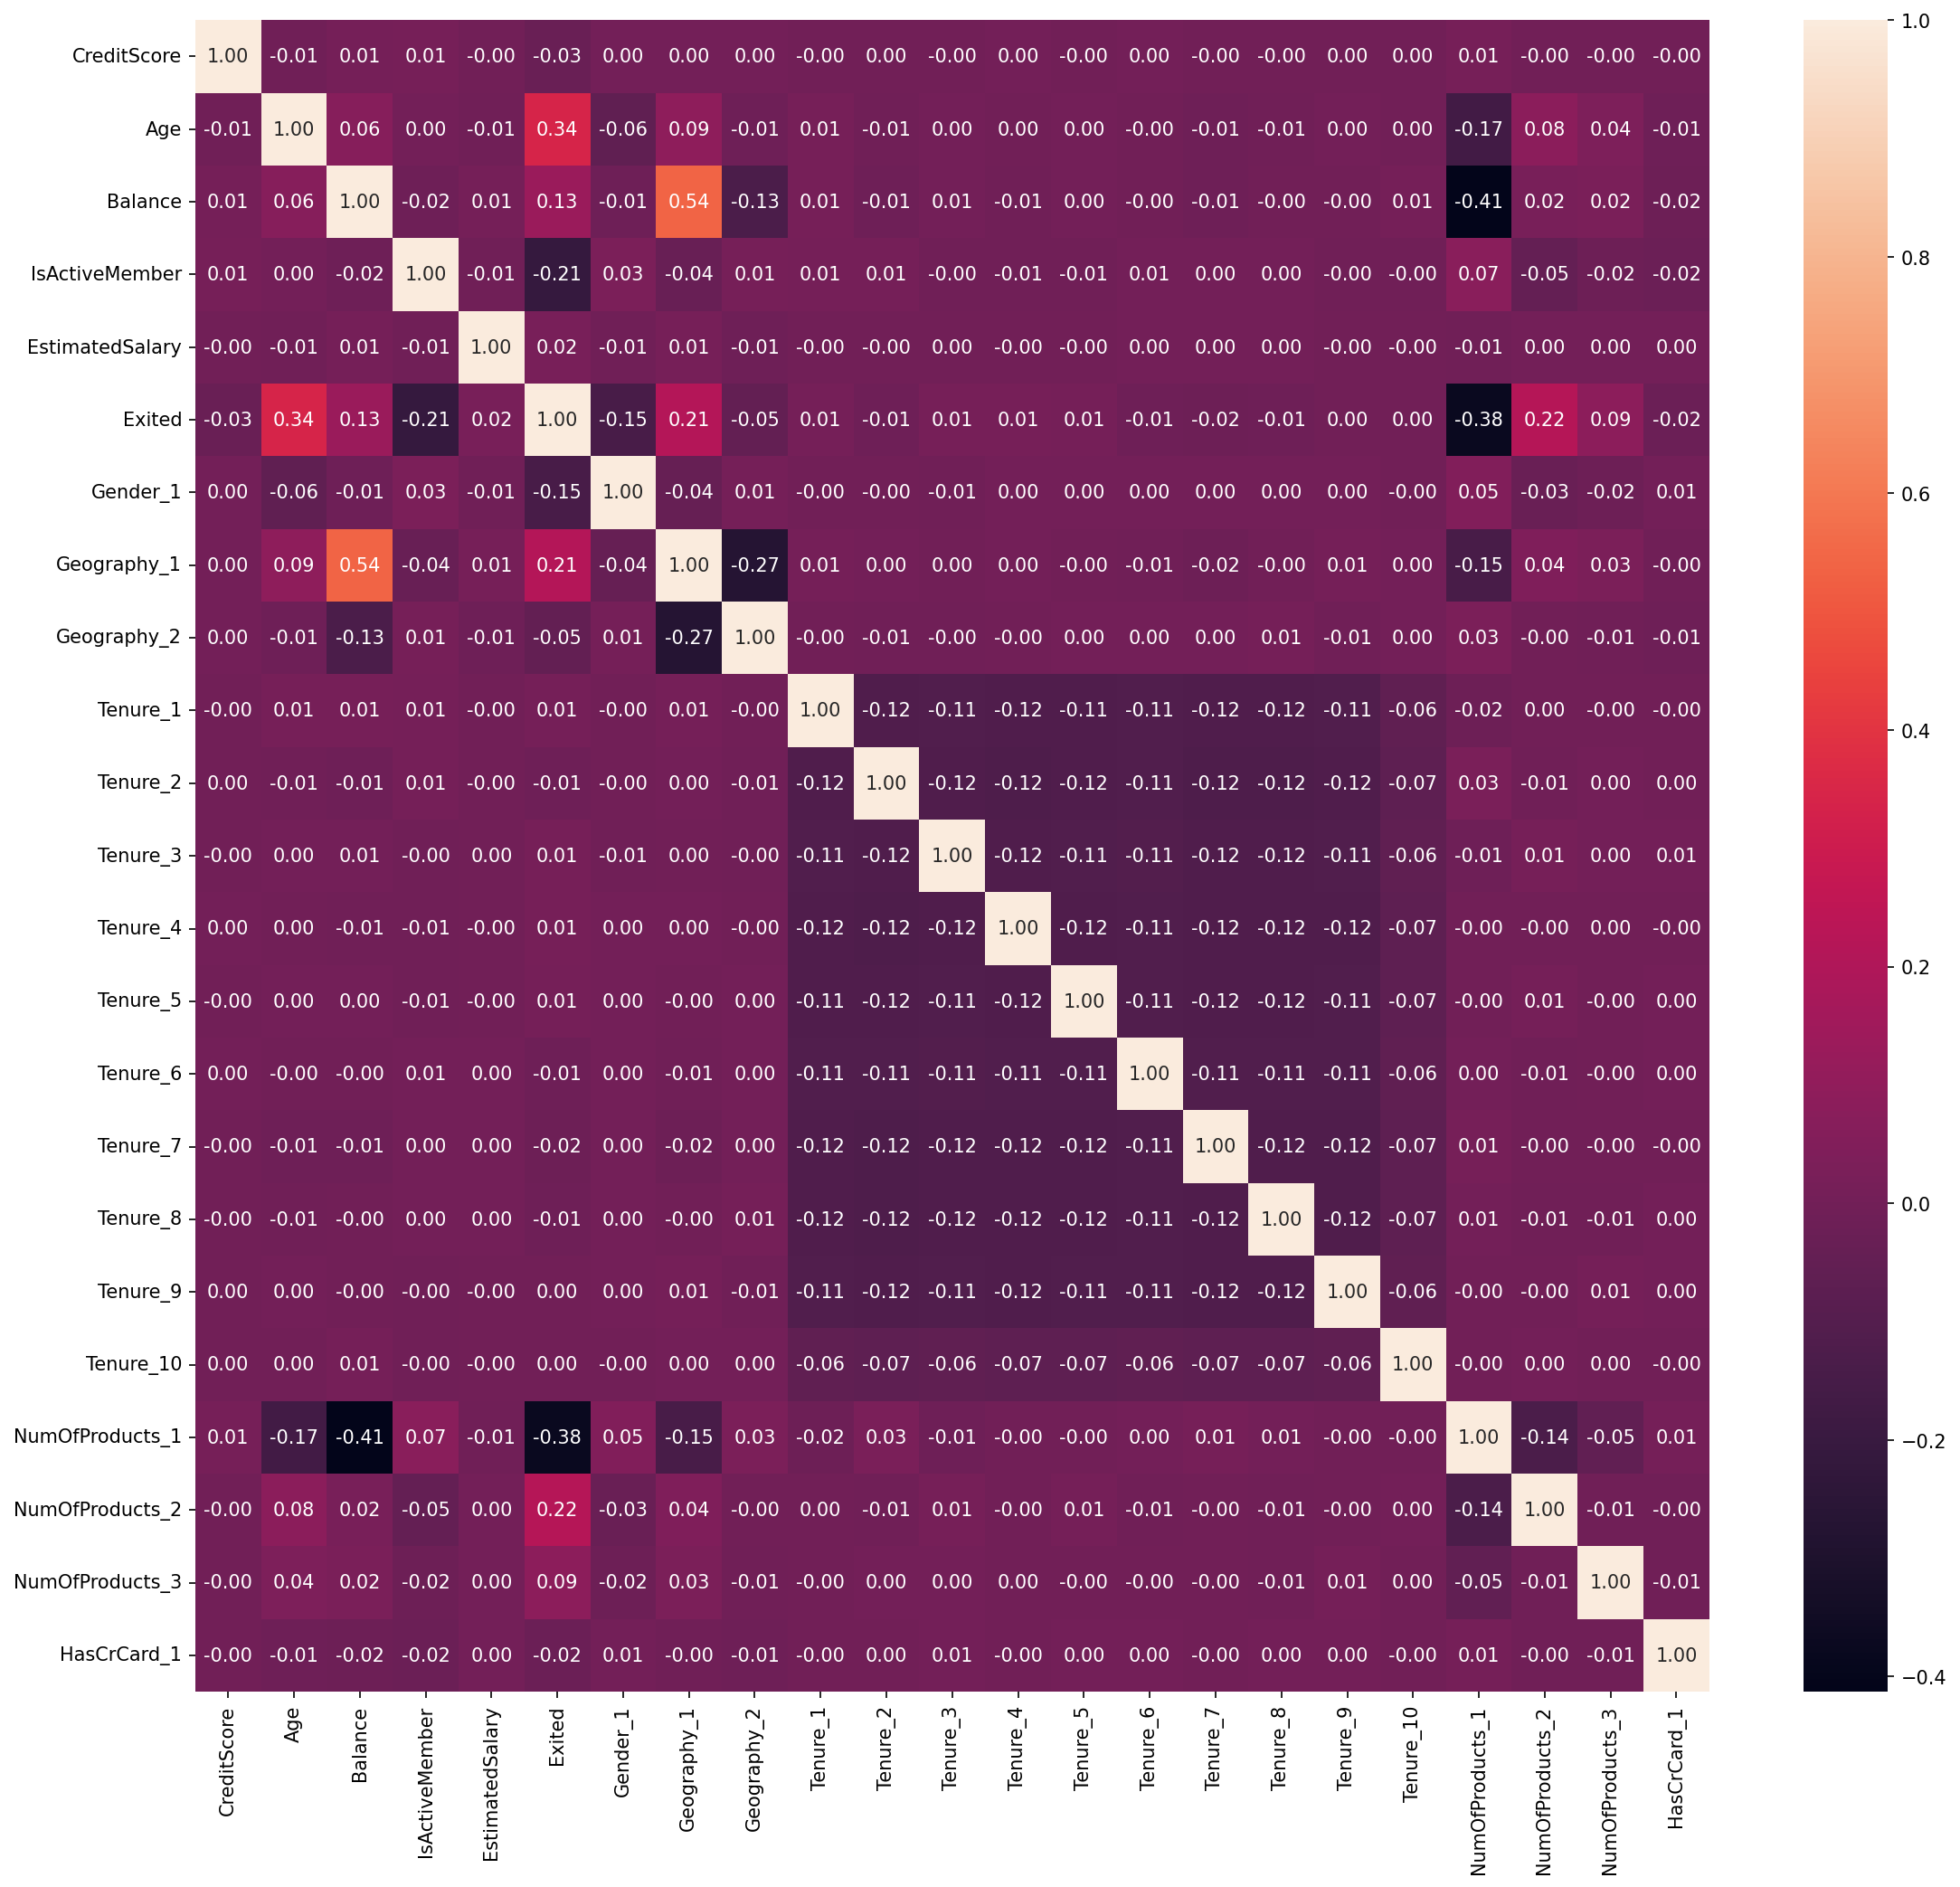

In [70]:
plt.figure(figsize=(18, 16), dpi=150)
sns.heatmap(df.corr(), fmt='.2f', annot=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Age              165034 non-null  float64
 2   Balance          165034 non-null  float64
 3   IsActiveMember   165034 non-null  float64
 4   EstimatedSalary  165034 non-null  float64
 5   Exited           165034 non-null  int64  
 6   Gender_1         165034 non-null  bool   
 7   Geography_1      165034 non-null  bool   
 8   Geography_2      165034 non-null  bool   
 9   Tenure_1         165034 non-null  bool   
 10  Tenure_2         165034 non-null  bool   
 11  Tenure_3         165034 non-null  bool   
 12  Tenure_4         165034 non-null  bool   
 13  Tenure_5         165034 non-null  bool   
 14  Tenure_6         165034 non-null  bool   
 15  Tenure_7         165034 non-null  bool   
 16  Tenure_8         165034 non-null  bool

In [72]:
df['IsActiveMember'].value_counts()

IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64

In [73]:
df['IsActiveMember'] = df['IsActiveMember'].astype('category')
df['IsActiveMember'] = df['IsActiveMember'].cat.codes
df = pd.get_dummies(df, columns=['IsActiveMember'], drop_first=True)

<Axes: >

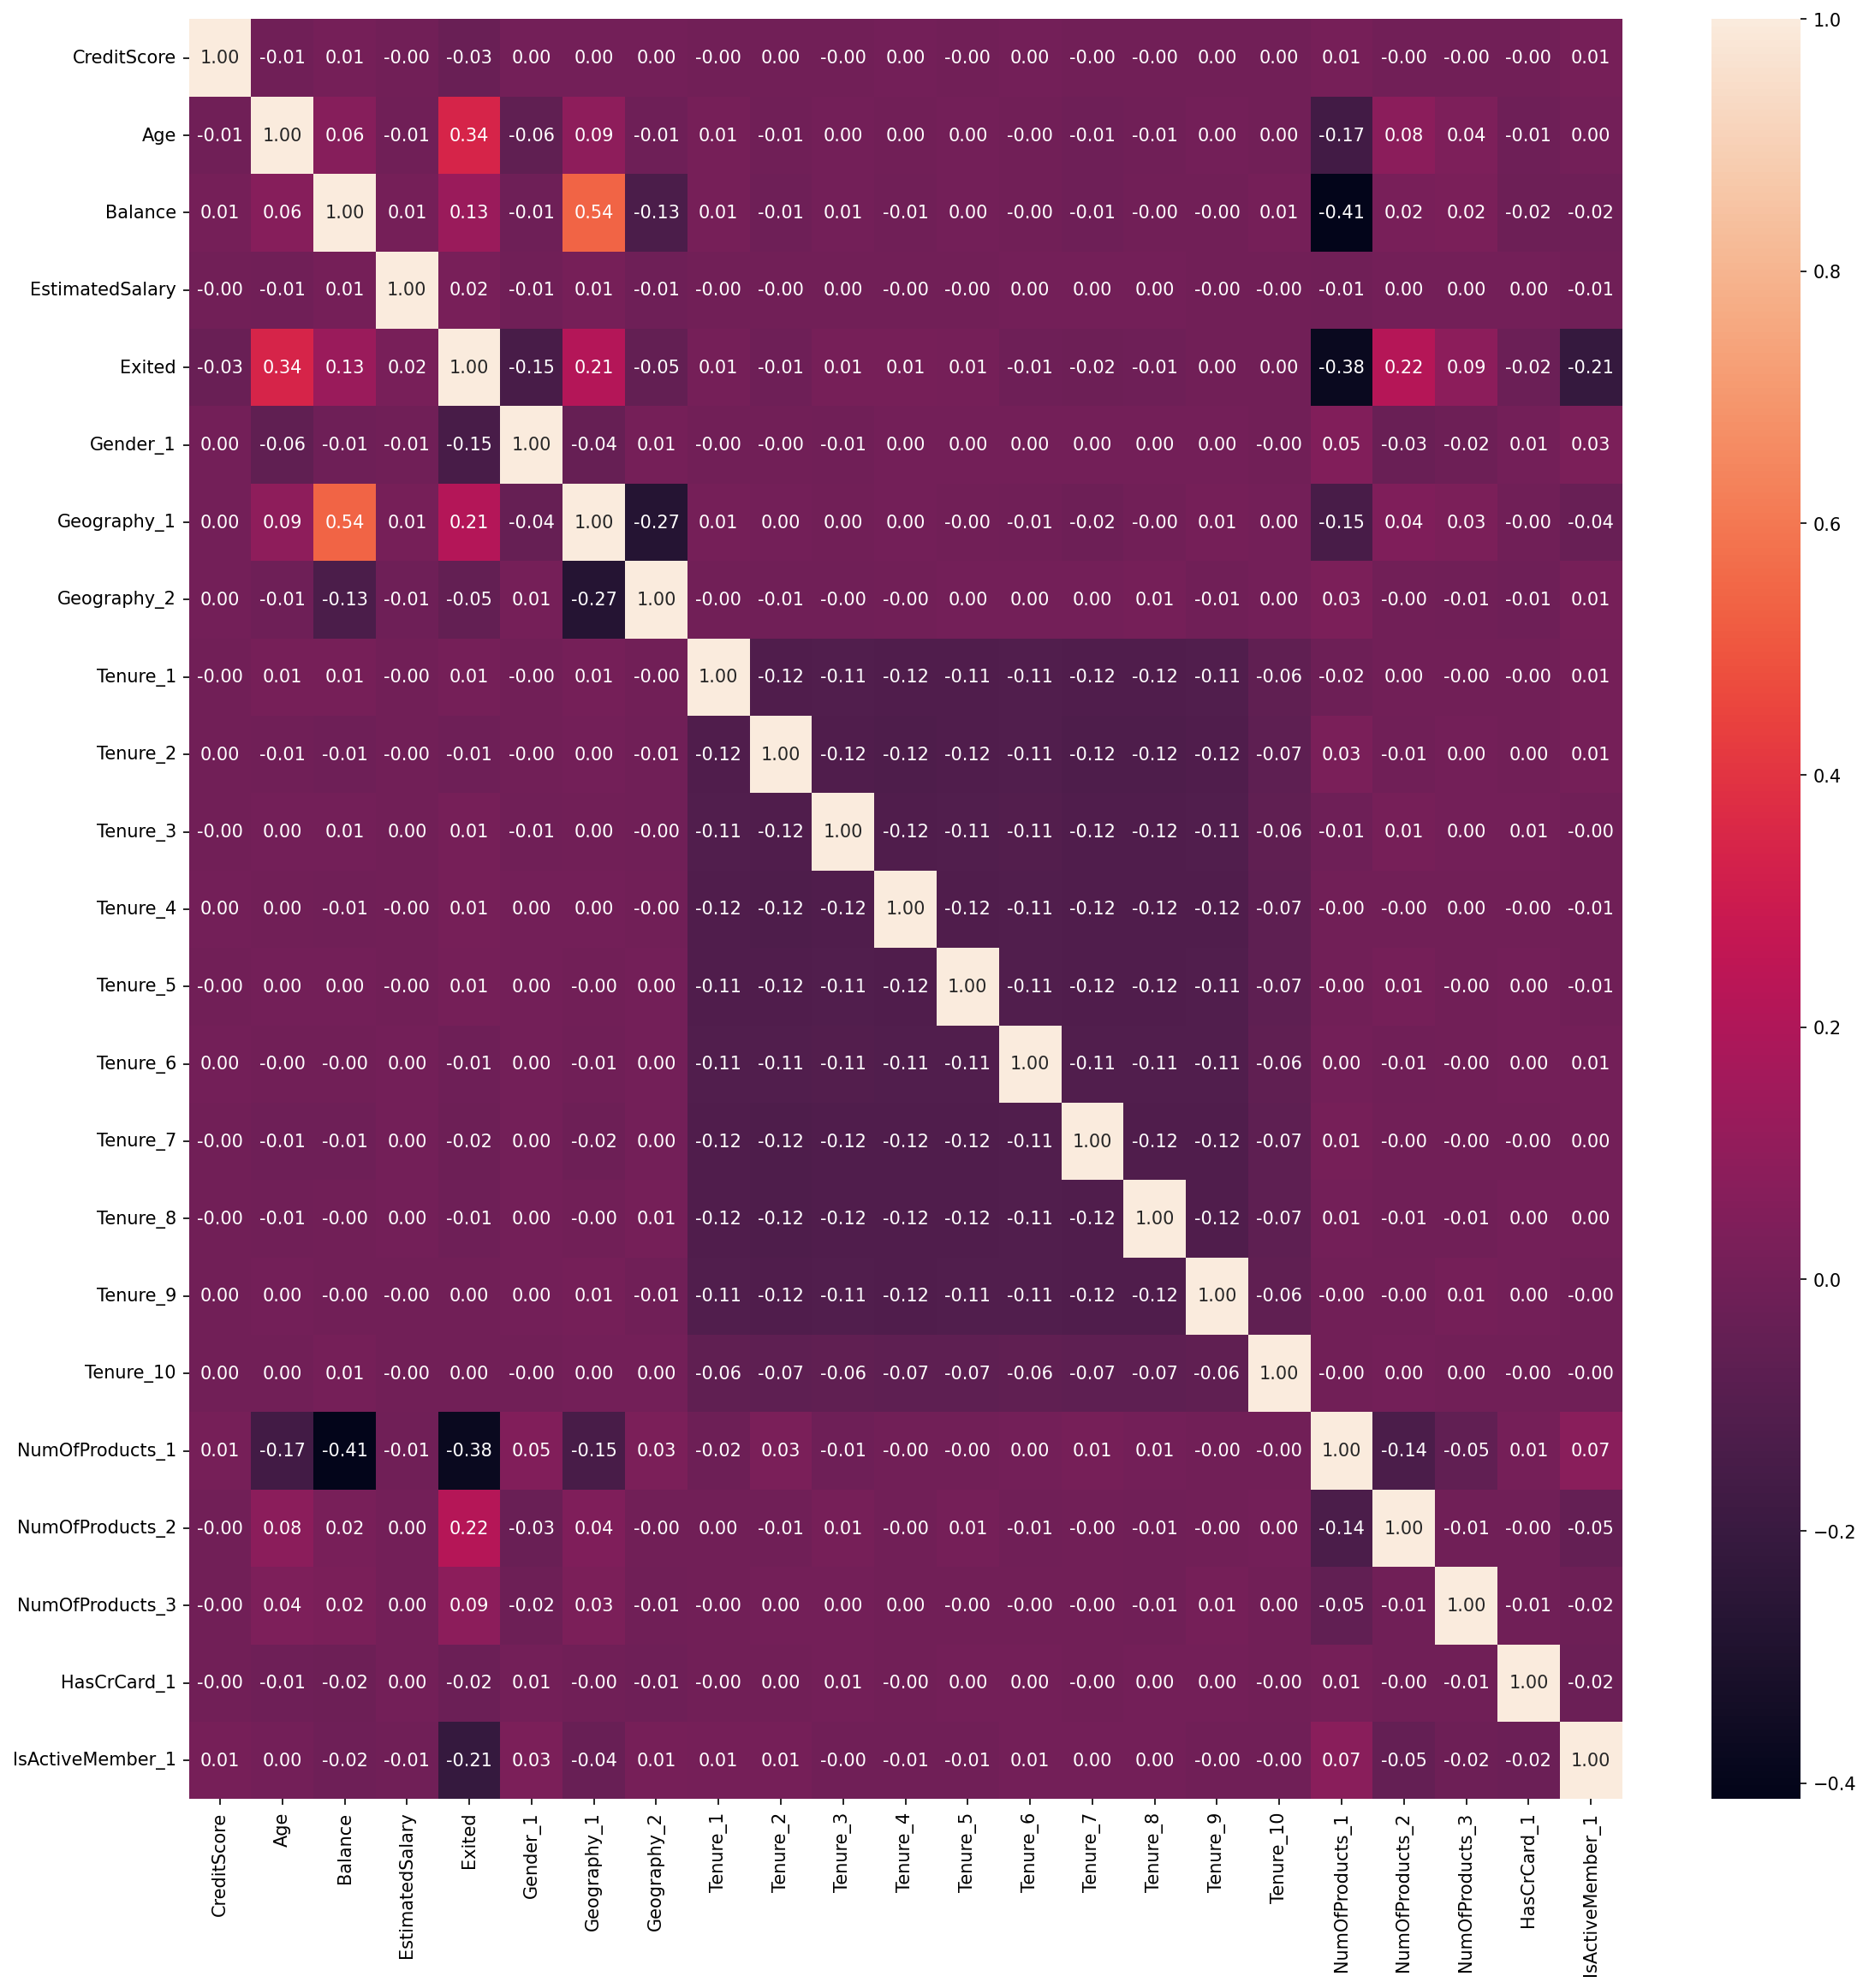

In [74]:
plt.figure(figsize=(18, 18), dpi=150)
sns.heatmap(df.corr(), fmt='.2f', annot=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CreditScore       165034 non-null  int64  
 1   Age               165034 non-null  float64
 2   Balance           165034 non-null  float64
 3   EstimatedSalary   165034 non-null  float64
 4   Exited            165034 non-null  int64  
 5   Gender_1          165034 non-null  bool   
 6   Geography_1       165034 non-null  bool   
 7   Geography_2       165034 non-null  bool   
 8   Tenure_1          165034 non-null  bool   
 9   Tenure_2          165034 non-null  bool   
 10  Tenure_3          165034 non-null  bool   
 11  Tenure_4          165034 non-null  bool   
 12  Tenure_5          165034 non-null  bool   
 13  Tenure_6          165034 non-null  bool   
 14  Tenure_7          165034 non-null  bool   
 15  Tenure_8          165034 non-null  bool   
 16  Tenure_9          16

In [76]:
from xgboost import XGBClassifier

In [77]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [80]:
tree_model = DecisionTreeClassifier(random_state=101)

In [81]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [4, 5, 6],
              'min_samples_split': [100, 150, 200],
              'min_samples_leaf': [75, 125, 175]}

In [82]:
grid_tree = GridSearchCV(tree_model, param_grid, scoring='f1', cv=10)

In [83]:
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6],
                         'min_samples_leaf': [75, 125, 175],
                         'min_samples_split': [100, 150, 200]},
             scoring='f1')

In [84]:
grid_tree.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 175,
 'min_samples_split': 100,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 101,
 'splitter': 'best'}

In [85]:
tree_model.set_params(criterion = 'gini', max_depth = 6, min_samples_leaf = 175, min_samples_split=100)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=175, min_samples_split=100,
                       random_state=101)

In [86]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=175, min_samples_split=100,
                       random_state=101)

In [87]:
train_pred = tree_model.predict(X_train)
test_pred = tree_model.predict(X_test)

In [90]:
print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_test, test_pred))

0.8572192360883388
0.8602762966553563


In [91]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     19559
           1       0.73      0.53      0.61      5197

    accuracy                           0.86     24756
   macro avg       0.81      0.74      0.76     24756
weighted avg       0.85      0.86      0.85     24756



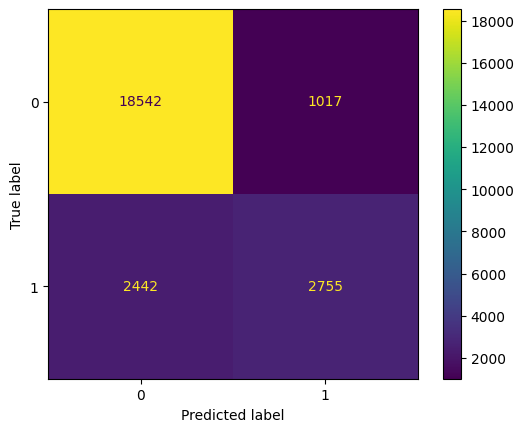

In [92]:
ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test)

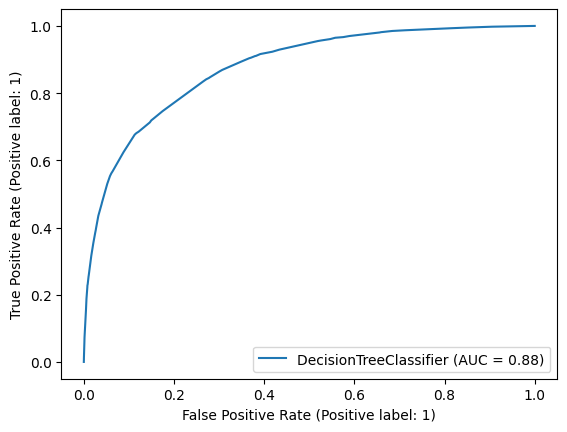

In [93]:
RocCurveDisplay.from_estimator(tree_model, X_test, y_test)

In [94]:
from sklearn.tree import plot_tree

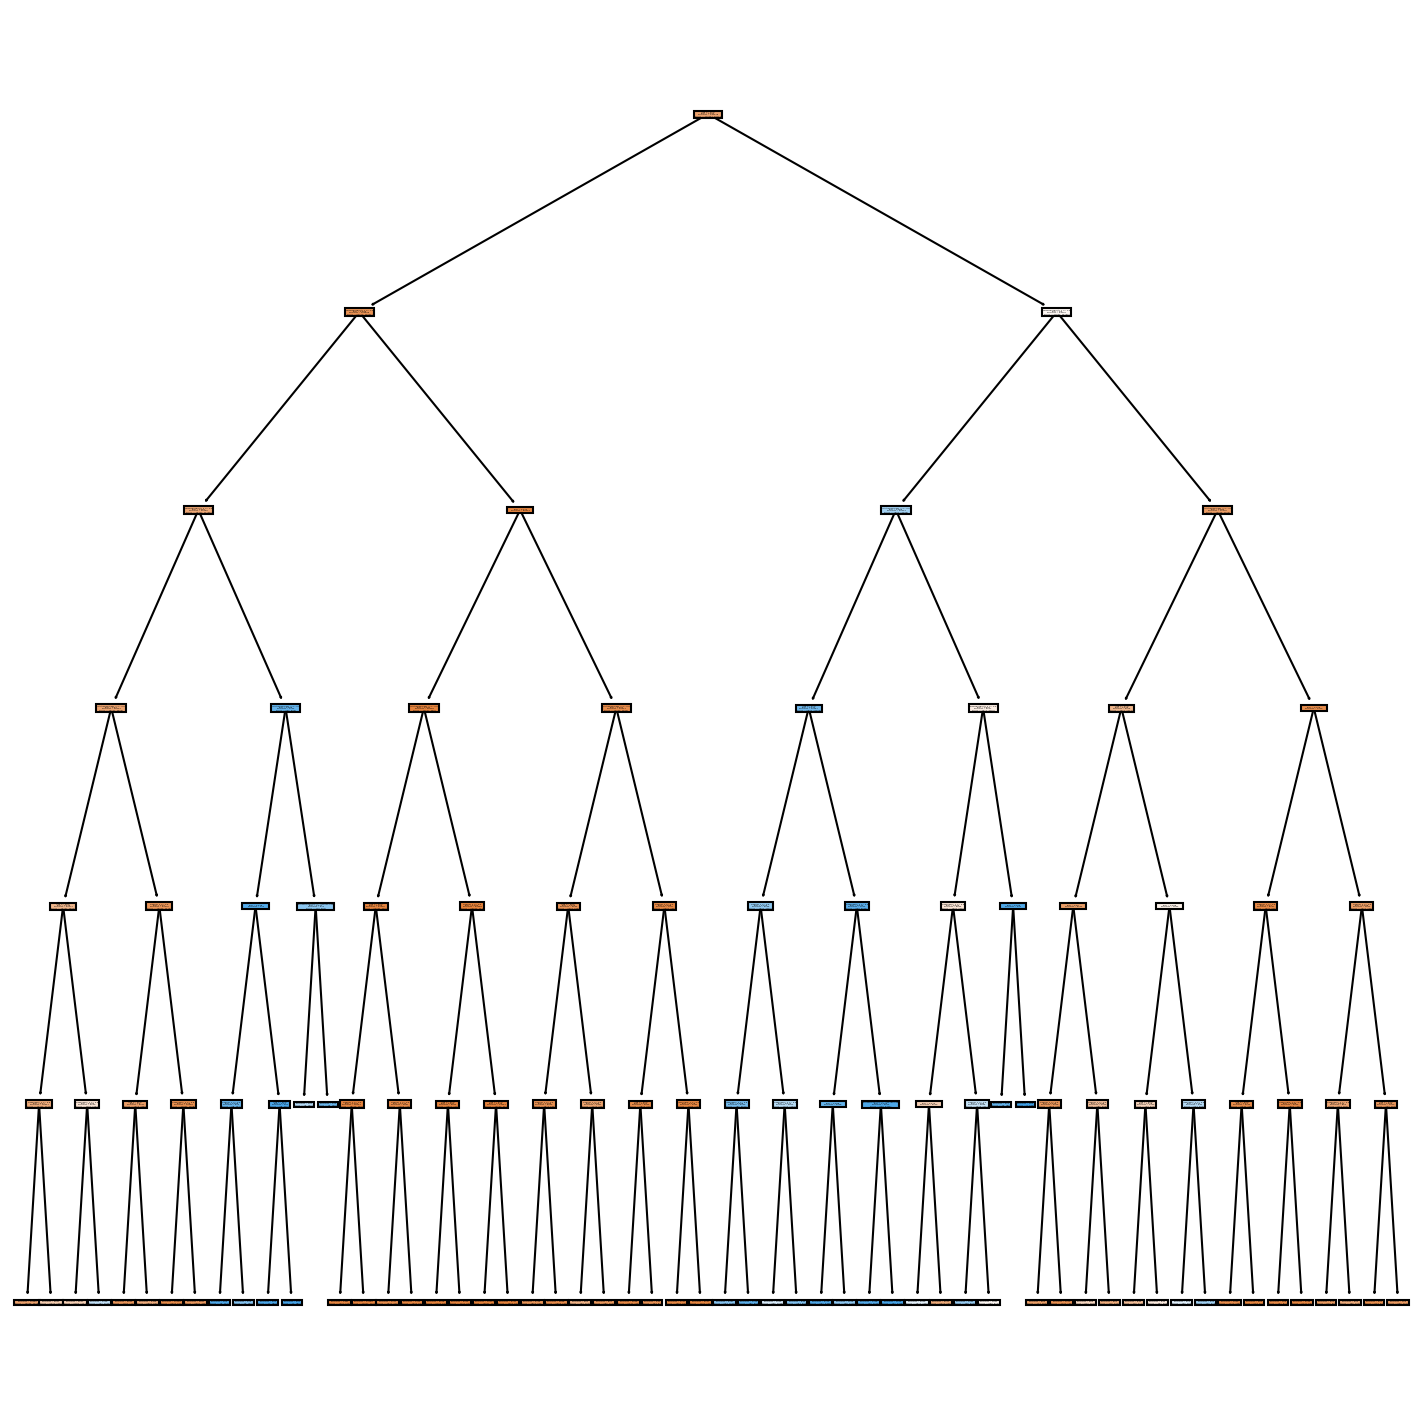

In [95]:
plt.figure(figsize=(12,12),dpi=150)
plot_tree(tree_model,filled=True,feature_names=X.columns);

In [96]:
rf_model = RandomForestClassifier(random_state=101)

In [97]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [4, 5, 6],
              'min_samples_split': [100, 150, 200],
              'min_samples_leaf': [75, 125, 175]}

In [98]:
random_rf_model = GridSearchCV(rf_model, param_grid, scoring='f1', cv=10)

In [99]:
random_rf_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=101),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6],
                         'min_samples_leaf': [75, 125, 175],
                         'min_samples_split': [100, 150, 200]},
             scoring='f1')

In [100]:
random_rf_model.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 125,
 'min_samples_split': 100,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 101,
 'verbose': 0,
 'warm_start': False}

In [101]:
rf_model.set_params(criterion='entropy', max_depth=6, min_samples_leaf=125, min_samples_split=100, oob_score=True)

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=125,
                       min_samples_split=100, oob_score=True, random_state=101)

In [102]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=125,
                       min_samples_split=100, oob_score=True, random_state=101)

In [103]:
train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)

In [104]:
print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_test, test_pred))

0.8527352827955916
0.8541363709807723


In [105]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     19559
           1       0.81      0.40      0.54      5197

    accuracy                           0.85     24756
   macro avg       0.83      0.69      0.72     24756
weighted avg       0.85      0.85      0.83     24756



In [106]:
rf_model.set_params(n_estimators=300)

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=125,
                       min_samples_split=100, n_estimators=300, oob_score=True,
                       random_state=101)

In [107]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=125,
                       min_samples_split=100, n_estimators=300, oob_score=True,
                       random_state=101)

In [108]:
train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)

In [109]:
print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_test, test_pred))

0.8530917178745063
0.8537728227500404


In [110]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91     19559
           1       0.81      0.40      0.53      5197

    accuracy                           0.85     24756
   macro avg       0.83      0.69      0.72     24756
weighted avg       0.85      0.85      0.83     24756



In [111]:
xgb_model = XGBClassifier()

In [112]:
xgb_model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.42931
[1]	validation_0-logloss:0.38758
[2]	validation_0-logloss:0.36368
[3]	validation_0-logloss:0.34868
[4]	validation_0-logloss:0.33823
[5]	validation_0-logloss:0.33169
[6]	validation_0-logloss:0.32764
[7]	validation_0-logloss:0.32490
[8]	validation_0-logloss:0.32290
[9]	validation_0-logloss:0.32179
[10]	validation_0-logloss:0.32093
[11]	validation_0-logloss:0.32033
[12]	validation_0-logloss:0.32011
[13]	validation_0-logloss:0.31976
[14]	validation_0-logloss:0.31956
[15]	validation_0-logloss:0.31937
[16]	validation_0-logloss:0.31919
[17]	validation_0-logloss:0.31912
[18]	validation_0-logloss:0.31884
[19]	validation_0-logloss:0.31878
[20]	validation_0-logloss:0.31874
[21]	validation_0-logloss:0.31871
[22]	validation_0-logloss:0.31882
[23]	validation_0-logloss:0.31874
[24]	validation_0-logloss:0.31877
[25]	validation_0-logloss:0.31881
[26]	validation_0-logloss:0.31873
[27]	validation_0-logloss:0.31878
[28]	validation_0-logloss:0.31880
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [113]:
train_pred = xgb_model.predict(X_train)
test_pred = xgb_model.predict(X_test)

In [114]:
print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_test, test_pred))

0.8680976346968163
0.8654467603813217


In [119]:
from random import uniform, randint

In [132]:
param_grid = {"colsample_bytree": [0.3, 0.4, 0.5, 0.6, 0.7],
    "gamma": [0.1, 0.2, 0.3, 0.4, 0.5],
    "learning_rate": [0.03, 0.1, 0.15, 0.2, 0.25, 0.3], # default 0.1 
    "max_depth": [3, 4, 5, 6], # default 3
    "n_estimators": [150, 200, 250, 300, 350, 400], # default 100
    "subsample": [0.4, 0.5, 0.6]}

In [133]:
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=-1, return_train_score=True)

In [134]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7],
                                        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5],
                                        'learning_rate': [0.03, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [150, 200, 250, 300,
                                                         350, 400],
                                        'subsample': [0.4, 0.5, 0.6]},
                   random_state=42, return_train_score=True, verbose=1)

In [135]:
random_search.best_estimator_.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.7,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0.2,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.03,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 5,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 300,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.5,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [136]:
xgb_model.set_params(colsample_bytree=0.7, gamma=0.2, learning_rate=0.03, max_depth=5, n_estimators=300, subsample=0.5)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [137]:
xgb_model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.51227
[1]	validation_0-logloss:0.50323
[2]	validation_0-logloss:0.49726
[3]	validation_0-logloss:0.49132
[4]	validation_0-logloss:0.48400
[5]	validation_0-logloss:0.47777
[6]	validation_0-logloss:0.47199
[7]	validation_0-logloss:0.46734
[8]	validation_0-logloss:0.46143
[9]	validation_0-logloss:0.45551
[10]	validation_0-logloss:0.45301
[11]	validation_0-logloss:0.44760
[12]	validation_0-logloss:0.44196
[13]	validation_0-logloss:0.43805
[14]	validation_0-logloss:0.43351
[15]	validation_0-logloss:0.42916
[16]	validation_0-logloss:0.42523
[17]	validation_0-logloss:0.42251
[18]	validation_0-logloss:0.41825
[19]	validation_0-logloss:0.41414
[20]	validation_0-logloss:0.41148
[21]	validation_0-logloss:0.40782
[22]	validation_0-logloss:0.40516
[23]	validation_0-logloss:0.40200
[24]	validation_0-logloss:0.39850
[25]	validation_0-logloss:0.39570
[26]	validation_0-logloss:0.39278
[27]	validation_0-logloss:0.39206
[28]	validation_0-logloss:0.38959
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [138]:
train_pred = xgb_model.predict(X_train)
test_pred = xgb_model.predict(X_test)

In [139]:
print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_test, test_pred))

0.8677055561100101
0.8660526740992083


In [140]:
test_df.head()

id  CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0  165034    15773898   Lucchese          586    France  Female  23.0       2   
1  165035    15782418       Nott          683    France  Female  46.0       2   
2  165036    15807120         K?          656    France  Female  34.0       7   
3  165037    15808905  O'Donnell          681    France    Male  36.0       8   
4  165038    15607314    Higgins          752   Germany    Male  38.0      10   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0       0.00              2        0.0             1.0        160976.75  
1       0.00              1        1.0             0.0         72549.27  
2       0.00              2        1.0             0.0        138882.09  
3       0.00              1        1.0             0.0        113931.57  
4  121263.62              1        1.0             0.0        139431.00

In [141]:
test_df.drop(['id', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [143]:
df.columns

Index(['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited',
       'Gender_1', 'Geography_1', 'Geography_2', 'Tenure_1', 'Tenure_2',
       'Tenure_3', 'Tenure_4', 'Tenure_5', 'Tenure_6', 'Tenure_7', 'Tenure_8',
       'Tenure_9', 'Tenure_10', 'NumOfProducts_1', 'NumOfProducts_2',
       'NumOfProducts_3', 'HasCrCard_1', 'IsActiveMember_1'],
      dtype='object')

In [146]:
test_df['Geography'] = test_df['Geography'].astype('category')
test_df['Geography'] = test_df['Geography'].cat.codes
test_df = pd.get_dummies(test_df, columns=['Geography'], drop_first=True)

In [142]:
test_df.head()

CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0          586    France  Female  23.0       2       0.00              2   
1          683    France  Female  46.0       2       0.00              1   
2          656    France  Female  34.0       7       0.00              2   
3          681    France    Male  36.0       8       0.00              1   
4          752   Germany    Male  38.0      10  121263.62              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0        0.0             1.0        160976.75  
1        1.0             0.0         72549.27  
2        1.0             0.0        138882.09  
3        1.0             0.0        113931.57  
4        1.0             0.0        139431.00

In [144]:
test_df['Gender'] = test_df['Gender'].astype('category')
test_df['Gender'] = test_df['Gender'].cat.codes
test_df = pd.get_dummies(test_df, columns=['Gender'], drop_first=True)

In [154]:
test_df.columns

Index(['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Gender_1',
       'Geography_1', 'Geography_2', 'Tenure_1', 'Tenure_2', 'Tenure_3',
       'Tenure_4', 'Tenure_5', 'Tenure_6', 'Tenure_7', 'Tenure_8', 'Tenure_9',
       'Tenure_10', 'NumOfProducts_1', 'NumOfProducts_2', 'NumOfProducts_3',
       'HasCrCard_1', 'IsActiveMember_1'],
      dtype='object')

In [156]:
X.columns

Index(['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Gender_1',
       'Geography_1', 'Geography_2', 'Tenure_1', 'Tenure_2', 'Tenure_3',
       'Tenure_4', 'Tenure_5', 'Tenure_6', 'Tenure_7', 'Tenure_8', 'Tenure_9',
       'Tenure_10', 'NumOfProducts_1', 'NumOfProducts_2', 'NumOfProducts_3',
       'HasCrCard_1', 'IsActiveMember_1'],
      dtype='object')

In [150]:
test_df['NumOfProducts'] = test_df['NumOfProducts'].astype('category')
test_df['NumOfProducts'] = test_df['NumOfProducts'].cat.codes
test_df = pd.get_dummies(test_df, columns=['NumOfProducts'], drop_first=True)

In [148]:
test_df['Tenure'] = test_df['Tenure'].astype('category')
test_df['Tenure'] = test_df['Tenure'].cat.codes
test_df = pd.get_dummies(test_df, columns=['Tenure'], drop_first=True)

In [152]:
test_df['HasCrCard'] = test_df['HasCrCard'].astype('category')
test_df['HasCrCard'] = test_df['HasCrCard'].cat.codes
test_df = pd.get_dummies(test_df, columns=['HasCrCard'], drop_first=True)

In [153]:
test_df['IsActiveMember'] = test_df['IsActiveMember'].astype('category')
test_df['IsActiveMember'] = test_df['IsActiveMember'].cat.codes
test_df = pd.get_dummies(test_df, columns=['IsActiveMember'], drop_first=True)

In [157]:
test_df.head()

CreditScore   Age    Balance  EstimatedSalary  Gender_1  Geography_1  \
0          586  23.0       0.00        160976.75     False        False   
1          683  46.0       0.00         72549.27     False        False   
2          656  34.0       0.00        138882.09     False        False   
3          681  36.0       0.00        113931.57      True        False   
4          752  38.0  121263.62        139431.00      True         True   

   Geography_2  Tenure_1  Tenure_2  Tenure_3  ...  Tenure_6  Tenure_7  \
0        False     False      True     False  ...     False     False   
1        False     False      True     False  ...     False     False   
2        False     False     False     False  ...     False      True   
3        False     False     False     False  ...     False     False   
4        False     False     False     False  ...     False     False   

   Tenure_8  Tenure_9  Tenure_10  NumOfProducts_1  NumOfProducts_2  \
0     False     False      False             True            False   
1     False     False      False            False            False   
2     False     False      False             True            False   
3      True     False      False            False            False   
4     False     False       True            False            False   

   NumOfProducts_3  HasCrCard_1  IsActiveMember_1  
0            False        False              True  
1            False         True             False  
2            False         True             False  
3            False         True             False  
4            False         True             False  

[5 rows x 22 columns]

In [159]:
result = xgb_model.predict(test_df)

In [160]:
result

array([0, 1, 0, ..., 0, 0, 0])

In [162]:
test_df['Exited'] = result

In [163]:
test_df[['id', 'Exited']].to_csv('xgboost.csv', index=False)